In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# Reading whale returns
whale_returns = Path("/Users/gcn/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_data.sort_index(axis=0,ascending=True)
whale_data.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
#identify number of rows and columns in df
whale_data.shape

(1060, 4)

In [4]:
#identify number of records in whale_data
whale_data.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
# Count nulls
# whale_data.isnull().mean()*100

In [6]:
# Drop nulls
whale_data.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
whale_returns = whale_data.dropna()
print(whale_returns)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns = Path("/Users/gcn/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_data.sort_index(axis=0,ascending=True)
algo_data.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [9]:
# Count nulls
algo_data.shape

(1241, 2)

In [10]:
algo_data.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [11]:
# Drop nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
algo_data = algo_data.dropna()
print(algo_data)

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
SP500_returns = Path("/Users/gcn/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_data = pd.read_csv(SP500_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_data.sort_index(axis=0,ascending=True)
sp500_data.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [14]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [15]:
sp500_data.index

DatetimeIndex(['2019-04-23', '2019-04-22', '2019-04-18', '2019-04-17',
               '2019-04-16', '2019-04-15', '2019-04-12', '2019-04-11',
               '2019-04-10', '2019-04-09',
               ...
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03',
               '2012-10-02', '2012-10-01'],
              dtype='datetime64[ns]', name='Date', length=1649, freq=None)

In [16]:
# Drop nulls
sp500_data = sp500_data.dropna()
sp500_data.isnull().sum()

Close    0
dtype: int64

In [17]:
# Fix Data Types
#? sp500_columns[["Date", "Close"]]
#? sp500_data = pd.to_numeric(sp500_data, errors='coerce')
# pd.to_numeric(sp500_data['Close']).astype('str').astype('int')
# sp500_data['Close']=sp500_data.astype('int')
sp500_data['Close'] = sp500_data['Close'].str.replace('$','')
sp500_data['Close'] = sp500_data['Close'].str.replace(',','')
sp500_data['Close'] = sp500_data['Close'].astype('float')

/var/folders/__/ydp5j0yj56n3g3tp3tq872pw0000gn/T/ipykernel_38118/3474589669.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data['Close'] = sp500_data['Close'].str.replace('$','')


In [18]:
sp500_data['Close'].dtypes

dtype('float64')

In [19]:
# Calculate Daily Returns
# def daily_returns (sp500_data):
  #  return Close[:1]/ Close [1:] -1
sp500_returns = sp500_data.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [20]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={"Close":"Daily Returns"})

,Daily Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat(([whale_data, algo_data, sp500_returns]), axis='columns', join='inner')
combined_returns.sort_index(inplace=True)
combined_returns = combined_returns.dropna()
combined_returns.tail(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2019-04-08,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218,0.006105
2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639,-0.003466
2019-04-10,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632,-0.000038
2019-04-11,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568,-0.006566
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [22]:
# Calculate daily returns
def compute_daily_returns(combined_returns):
    #Compute and return the daily return values
    daily_returns = combined_returns.pct_change()
# Daily return values for the first date cannot be calculated. Set these to zero.
   # daily_returns.ix[0, :] = 0
    print(daily_returns.head(10))
compute_daily_returns(combined_returns)
daily_returns = combined_returns.pct_change()

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                  -2.762070           -1.650792   
2015-03-05                   0.800968            0.257544   
2015-03-06                  -2.968465           -1.876837   
2015-03-09                  -1.073656           -2.182252   
2015-03-10                 -18.625495           -2.263954   
2015-03-11                  -1.390912           -1.966750   
2015-03-12                   1.060018            0.989412   
2015-03-13                  -1.302164           -1.139064   
2015-03-16                  -4.163697           -3.508046   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                     4.113

<AxesSubplot:title={'center':'combined returns'}, xlabel='Date'>

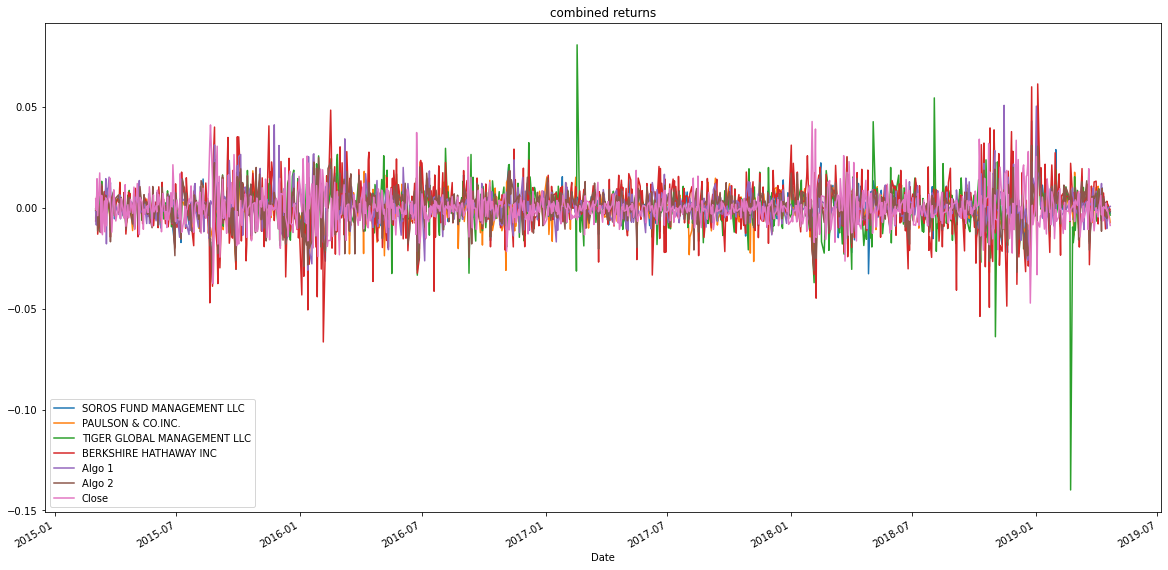

In [23]:
# Plot daily returns of all portfoliosdaily_returns.plot()
combined_returns.plot(figsize=(20,10),title='combined returns')

#### Calculate and Plot cumulative returns.

In [24]:
# Calculate cumulative returns of all portfolios
def compute_cumulative_returns(combined_returns):
    cumulative_returns = (1 + daily_returns).cumprod()/n
    cumulative_returns.head()
    
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.head()
#print(compute_cumulative_returns(combined_returns))

#cumulative_returns = (1 + daily_returns).cumprod()/n

#np.cumprod(1 + daily_returns['combined_returns'].values) - 1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


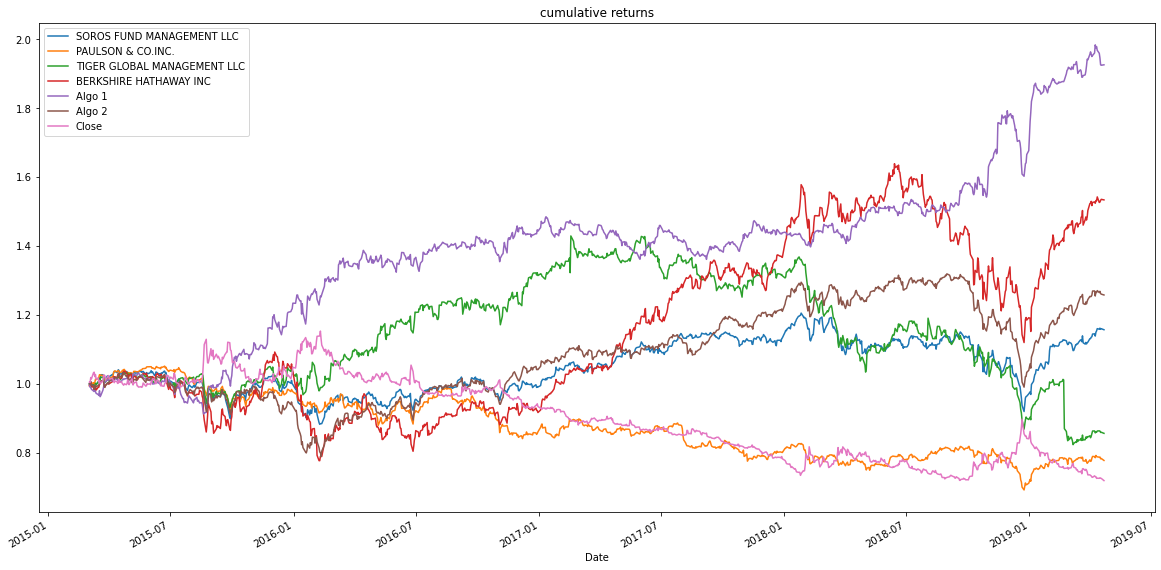

In [25]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title='cumulative returns');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


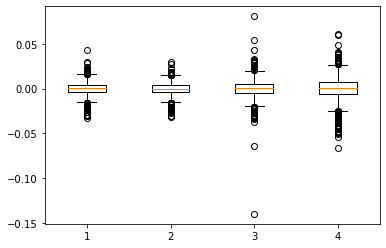

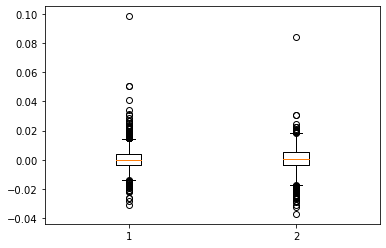

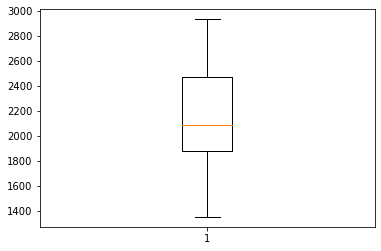

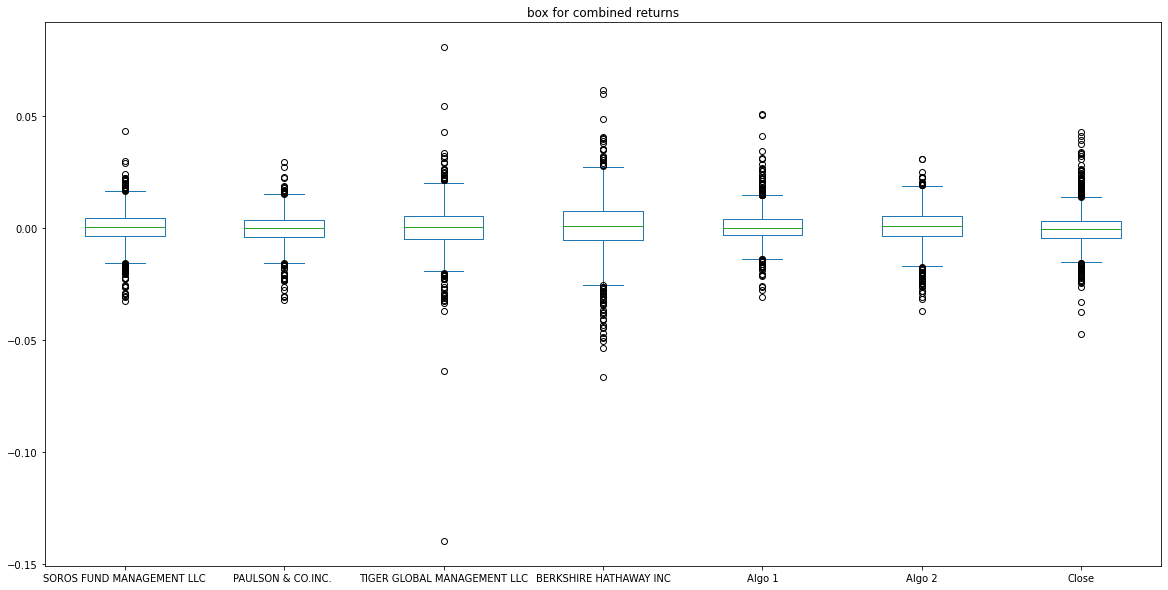

In [26]:
# Box plot to visually show risk
#plt.boxplot(data)
#plt.show()

plt.boxplot(whale_returns)
plt.show()

plt.boxplot(algo_data)
plt.show()

plt.boxplot(sp500_data)
plt.show()

combined_returns.plot.box(figsize=(20,10), title="box for combined returns");


### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
whale_returns_day_std = whale_returns.std()
whale_returns_day_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [28]:
algo_data_day_std = algo_data.std()
algo_data_day_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [29]:
sp500_returns_day_std = sp500_returns.std()
sp500_returns_day_std.head()

Close    0.008135
dtype: float64

In [30]:
combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Close                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [31]:
# Determine which portfolios are riskier than the S&P 500
# Use the `std` function and multiply by the square root of the 
#number of trading days in a year to get annualized volatility

volatility = whale_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
print(f"volatility whale portfolio {volatility}")

volatility_Algo = algo_data.std() * np.sqrt(252)
volatility_Algo.sort_values(inplace=True)
print(f"volatility Algo portfolio {volatility_Algo}")

volatility_snp = sp500_returns.std() * np.sqrt(252)
volatility_snp.sort_values(inplace=True)
print(f"volatility S&P500 {volatility_snp}")


volatility whale portfolio PAULSON & CO.INC.              0.110754
SOROS FUND MANAGEMENT LLC      0.124487
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64
volatility Algo portfolio Algo 1    0.126801
Algo 2    0.134401
dtype: float64
volatility S&P500 Close    0.129133
dtype: float64


In [32]:
total_vol = combined_returns.std() * np.sqrt(252)
total_vol

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
Close                          0.136313
dtype: float64

### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
whale_annual_std = whale_returns_day_std * np.sqrt(252)
whale_annual_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [34]:
algo_annual_std = algo_data_day_std * np.sqrt(252)
algo_annual_std.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [35]:
sp500_annual_std = sp500_returns_day_std * np.sqrt(252)
sp500_annual_std.head()

Close    0.129133
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

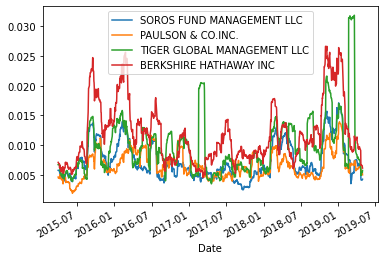

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_data.rolling(window=21).std().plot()

# Plot the rolling standard deviation


<AxesSubplot:xlabel='Date'>

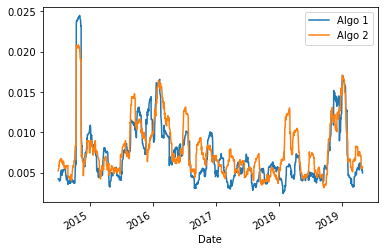

In [37]:
algo_data.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

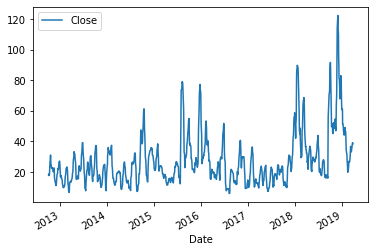

In [38]:
sp500_data.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

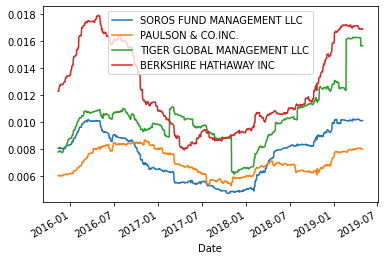

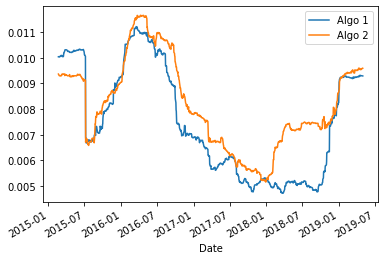

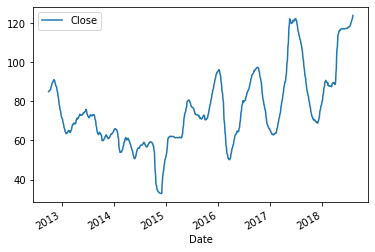

In [39]:
# Calculate the rolling 180-day rolling standard deviation
#sp500_df.rolling(window=180).std().plot()
whale_data.rolling(window=180).std().plot()
algo_data.rolling(window=180).std().plot()
sp500_data.rolling(window=180).std().plot()

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
Close                                         0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2         

<AxesSubplot:>

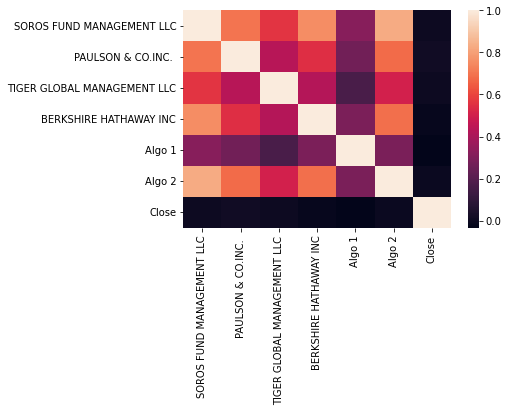

In [40]:
# Calculate the correlation
correlation_combined = combined_returns.corr()
print(correlation_combined)

# Display de correlation matrix
sns.heatmap(correlation_combined)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

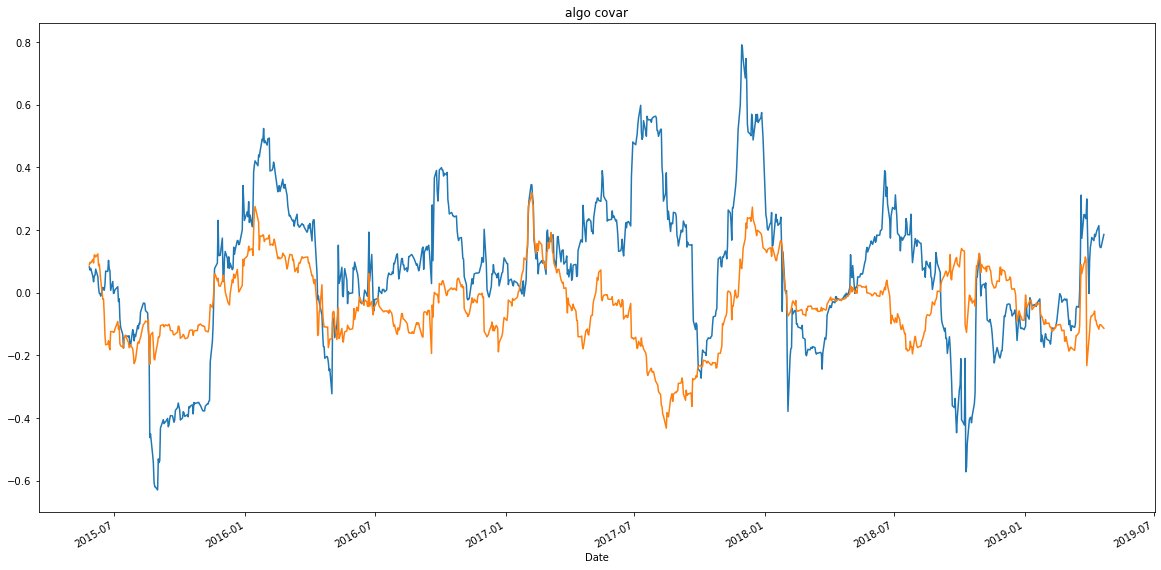

In [41]:
# Calculate covariance of a single portfolio
#Berk_covar = daily_returns['BERKSHIRE HATHAWAY INC'].cov(daily_returns['TIGER GLOBAL MANAGEMENT LLC'])
#print(Berk_covar)

berk_covar = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['Close'])
algo_covar = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['Close'])

#print(f"berk_covar: {berk_covar} algo_covar: {algo_covar}")

# Calculate variance of S&P 500

variance = combined_returns['Close'].rolling(window=60).var()
variance

# Computing beta

whale_beta = berk_covar / variance
algo_beta = algo_covar / variance

#print(f"WHALE: {whale_beta} | ALGO: {algo_beta}")

# Plot beta trend

whale_beta.plot(figsize=(20,10), title = "berks covar");
algo_beta.plot(figsize=(20,10), title= "algo covar");
# Set the figure and plot the different datasets as multiple trends on the same figure
#ax = whale_beta.plt(figsize=(20, 10), title='Beta of Berkshire Hathaway')
#algo_beta.plt(ax=ax)
#plt.show()

# Set the legend of the figure
#ax.legend(["Berk", "Algo"])


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

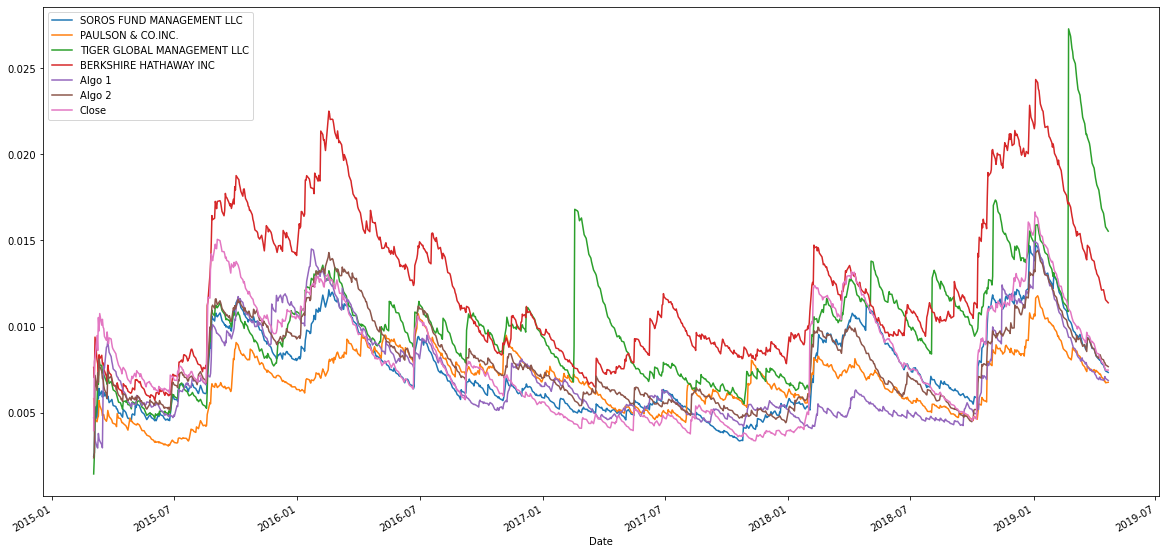

In [42]:
# Use `ewm` to calculate the rolling window

combined_returns.ewm(halflife=21).std().plot(figsize=(20,10));

# Set weights for corresponding risk profile of stocks, use the `dot` function to 
#multiply each weight by the corresponding stock daily return
#weights = [0.15, 0.05, 0.10, 0.2, 0.50]
#portfolio_returns = daily_returns.dot(weights)
#portfolio_returns.head()

#portfolio_combined_returns = combined_data_day_std.dot(weights)


#portfolio_combined_returns.head()



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios... whale_data, algo_data, sp500_returns

# Drop highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = correlation_combined.drop(columns=['Close'])
noncorrelated_daily_returns.head()

# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Close                         -0.518582
dtype: float64

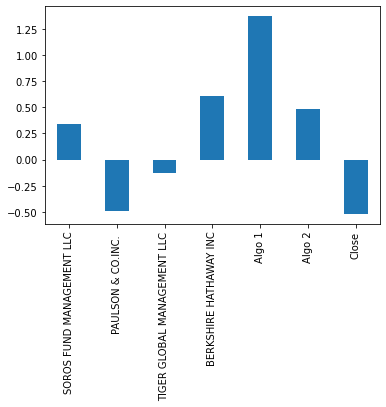

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar');



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Reading data from 1st stock
apple_returns = Path("/Users/gcn/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv")
apple_data = pd.read_csv(apple_returns, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
apple_data.sort_index(axis=0,ascending=True)
apple_data.head(10)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
2019-05-02,AAPL,209.15
2019-05-01,AAPL,210.52
2019-04-30,AAPL,200.67
2019-04-29,AAPL,204.61


In [46]:
# Reading data from 2nd stock
costco_returns = Path("/Users/gcn/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/cost_historical.csv")
costco_data = pd.read_csv(costco_returns, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
costco_data.sort_index(axis=0,ascending=True)
costco_data.head(10)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
2019-05-02,COST,242.69
2019-05-01,COST,241.59
2019-04-30,COST,245.53
2019-04-29,COST,244.28


In [47]:
# Reading data from 3rd stock
goog_returns = Path("/Users/gcn/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/goog_historical.csv")
goog_data = pd.read_csv(goog_returns, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_data.sort_index(axis=0,ascending=True)
goog_data.head(10)

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
2019-05-02,GOOG,1162.61
2019-05-01,GOOG,1168.08
2019-04-30,GOOG,1188.48
2019-04-29,GOOG,1287.58


In [48]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat(([apple_data, costco_data, goog_data]), axis='rows', join='inner')
combined_stocks.sort_index(inplace=True)
combined_stocks.tail(10)


,Symbol,NOCP
Trade DATE,,
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10
2019-05-07,COST,240.18
2019-05-07,AAPL,202.86
2019-05-08,GOOG,1166.27
2019-05-08,COST,241.34
2019-05-08,AAPL,202.90
2019-05-09,GOOG,1162.38
2019-05-09,COST,243.47


In [49]:
# Reset Date index
combined_stocks = combined_stocks.reset_index()
combined_stocks.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-11,AAPL,188.59
2,2018-05-11,COST,195.76
3,2018-05-14,AAPL,188.15
4,2018-05-14,COST,195.88


In [50]:
# Reorganize portfolio data by having a column per symbol
custom_folio = combined_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
custom_folio.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [51]:
# Calculate daily returns
#def compute_daily_returns(combined_stocks):
    #stocks_daily_returns = combined_stocks.pct_change()
    #print(compute_daily_returns.head(10))

custom_returns = custom_folio.pct_change()
    
# Drop NAs
custom_returns = custom_returns.dropna().copy()
#combined_data_drop.na.isnull().sum()

# Display sample data
custom_returns.head(10)


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
2018-05-21,0.007085,0.003317,0.012397
2018-05-22,-0.002505,-0.003256,-0.009124
2018-05-23,0.006412,-0.004171,0.009311
2018-05-24,-0.001115,0.003785,-0.000417


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weight_return = custom_returns.dot(weights)

# Display sample data
weight_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['Custom'] = weight_return
combined_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`
combined_returns_day_std = combined_returns.std()
combined_returns_day_std.head()

combined_annual_std = combined_returns_day_std * np.sqrt(252)
combined_annual_std.head()

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

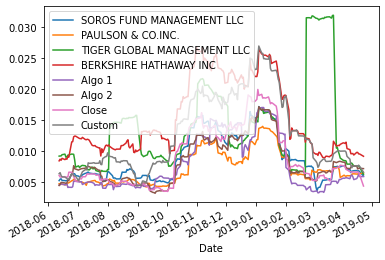

In [56]:
# Calculate rolling standard deviation
combined_returns.rolling(window=21).std().plot()

# Plot rolling standard deviation


### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791802   
PAULSON & CO.INC.                             0.791802            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.477844            0.484869   
BERKSHIRE HATHAWAY INC                        0.816197            0.650390   
Algo 1                                        0.336909            0.360727   
Algo 2                                        0.862583            0.783865   
Close                                        -0.028256           -0.059862   
Custom                                        0.732548            0.643828   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.477844   
PAULSON & CO.INC.                               0.484869   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.324306 

<AxesSubplot:>

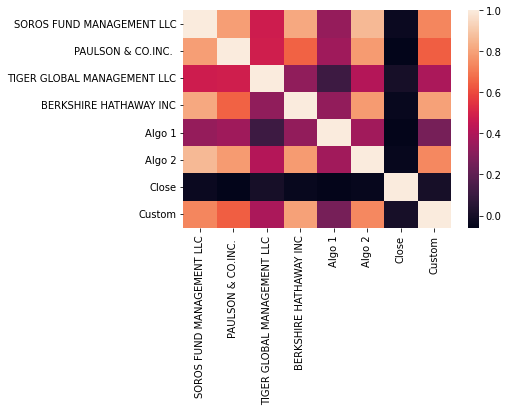

In [57]:
# Calculate and plot the correlation
correlation_custom = combined_returns.corr()
print(correlation_custom)

# Display de correlation matrix
sns.heatmap(correlation_custom)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

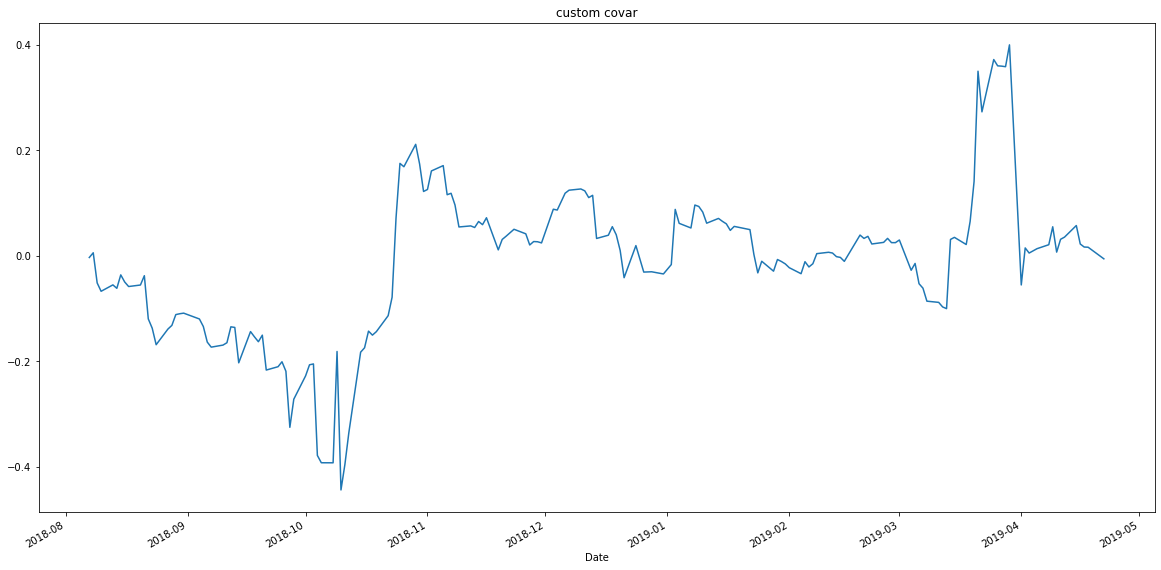

In [58]:
# Calculate and plot Beta

custom_covar = combined_returns['Custom'].rolling(window=60).cov(combined_returns['Close'])

# Calculate variance of S&P 500

variance = combined_returns['Close'].rolling(window=60).var()
variance

# Computing beta

custom_beta = custom_covar / variance

# Plot beta trend

custom_beta.plot(figsize=(20,10), title = "custom covar");


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Calculate Annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios_custom = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios_custom




SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
Close                         -0.427676
Custom                         0.876152
dtype: float64

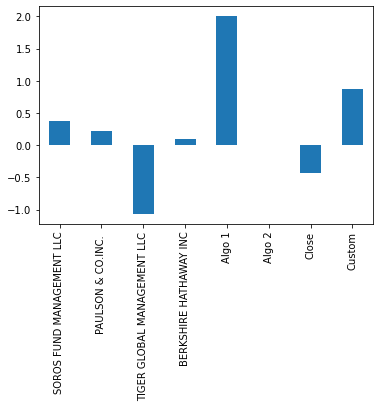

In [60]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_custom.plot(kind='bar');

### How does your portfolio do?

Write your answer here!

In [ ]:
# The custom portfolio performs better when compared to the S&P 500, with less volatility.